In [51]:
### Análisis de NetCrime - Esqueleto del Cuaderno (Preprocesamiento + Visualizaciones con Seaborn)

# 1. Import libraries
import pandas as pd
import seaborn as sns # Para visualizaciones
import matplotlib.pyplot as plt

In [52]:
# 1. Cargar dataset
df_base = pd.read_csv('LossFromNetCrime.csv')


# 2. Renombrar columna Country a pais
if 'Country' in df_base.columns:
 df_base.rename(columns={'Country': 'pais'}, inplace=True)


# 3. Normalizar nombres de columnas
df_base.columns = (
df_base.columns
.str.strip()
.str.lower()
.str.replace('-', '_')
)

In [53]:
# 4. Transformar de formato wide a largo
df_melt = df_base.melt(
id_vars=['pais'],
var_name='anio_tipo',
value_name='valor'
)


# 5. Separar 'anio_tipo' en 'anio' y 'tipo_incidente'
df_melt[['anio', 'tipo_incidente']] = (
df_melt['anio_tipo']
.str.split('_', expand=True)
)
# Convertir 'anio' a entero
df_melt['anio'] = df_melt['anio'].astype(int)


# 6. Pivotear para columnas de quejas y perdidas
df_limpios = (
df_melt
.pivot_table(
index=['pais', 'anio'],
columns='tipo_incidente',
values='valor'
)
.reset_index()
)
# Renombrar columnas sin caracteres especiales
df_limpios.rename(columns={
'complaints': 'quejas',
'losses': 'perdidas'
}, inplace=True)

In [54]:
# 7. Ordenar y revisar resultados
df_limpios = df_limpios.sort_values(['pais', 'anio']).reset_index(drop=True)


# Mostrar las primeras filas
df_limpios.head()

tipo_incidente,pais,anio,quejas,perdidas
0,AE,2019,5503.0,48101706.0
1,AE,2020,7390.0,81178182.0
2,AE,2021,10164.0,131934602.0
3,AE,2022,10042.0,187062157.0
4,AE,2023,11034.0,244238485.0


### 🔹 Ranking de Países por Pérdidas (Top 15)

Mostramos los 15 países con mayores pérdidas en el año elegido (`anio_objetivo = 2020`).  
Se usa un gráfico de **barras horizontales**, lo que facilita comparar rápidamente los valores.


Text(0.5, 1.0, 'Top 15 Países por Pérdidas - 2020')

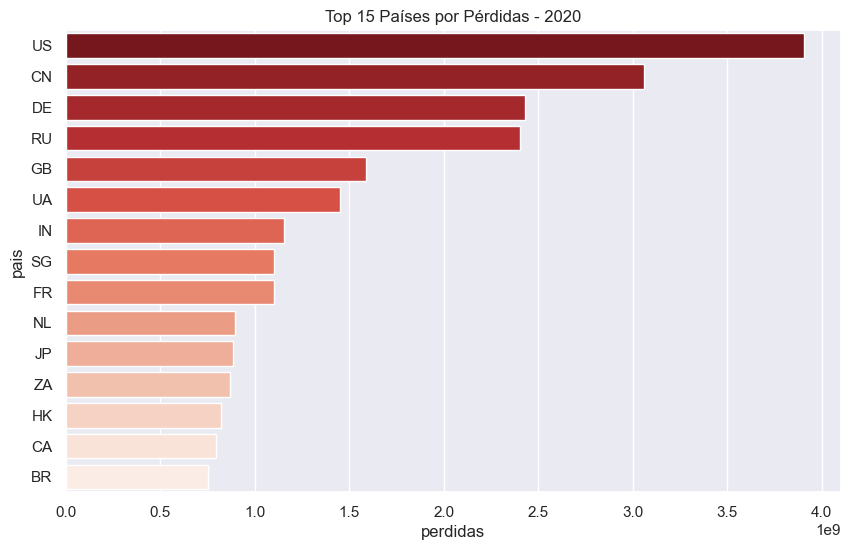

In [57]:
anio_objetivo = 2020
ranking_perdidas = (
    df_limpios[df_limpios['anio'] == anio_objetivo]
    .sort_values('perdidas', ascending=False)
    .head(15)
)

sns.set(rc={'figure.figsize': (10, 6)})
sns.barplot(
    data=ranking_perdidas,
    x='perdidas', y='pais',
    hue='pais',               # usamos pais como hue
    palette='Reds_r', 
    orient='h',
    dodge=False, legend=False # quitamos la leyenda
).set_title(f"Top 15 Países por Pérdidas - {anio_objetivo}")


### Relación entre Quejas y Pérdidas (Scatterplot)

Con un gráfico de dispersión se analiza si más quejas implican necesariamente más pérdidas.
Cada punto representa un país en el año elegido. El tamaño de los puntos es proporcional a las pérdidas.

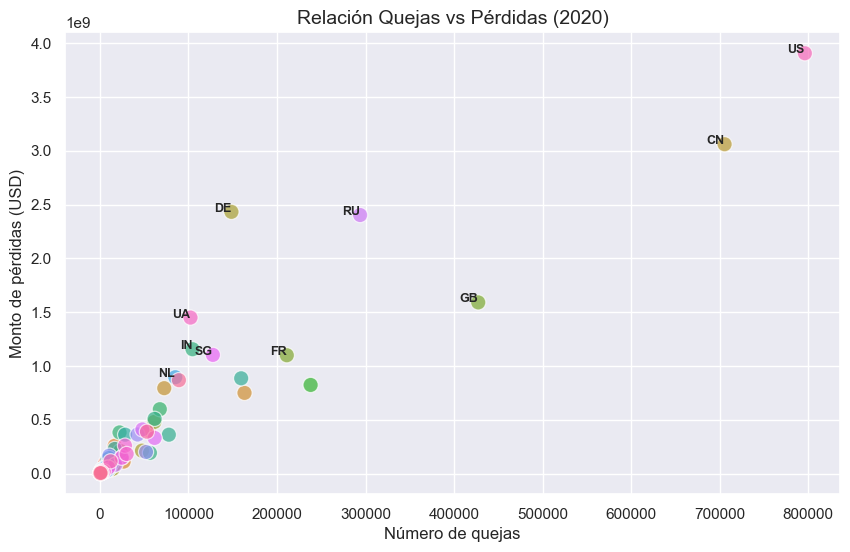

In [56]:


anio_objetivo = 2020
df_anio = df_limpios[df_limpios['anio'] == anio_objetivo]

# Scatterplot con colores por país
plt.figure(figsize=(10,6))
ax = sns.scatterplot(
    data=df_anio,
    x='quejas', y='perdidas',
    hue='pais',   # cada país con color distinto
    s=120, alpha=0.7, legend=False  # quitamos leyenda gigante
)

# Etiquetar solo los 10 países con más pérdidas
top = df_anio.sort_values('perdidas', ascending=False).head(10)
for _, fila in top.iterrows():
    plt.text(
        fila['quejas'], fila['perdidas'], fila['pais'],
        fontsize=9, ha='right', weight='bold'
    )

ax.set_title(f"Relación Quejas vs Pérdidas ({anio_objetivo})", fontsize=14)
ax.set_xlabel("Número de quejas")
ax.set_ylabel("Monto de pérdidas (USD)")
plt.show()


## 📊 Relación Quejas vs. Pérdidas (2020)

El análisis de la dispersión entre el número de **quejas** y el monto de **pérdidas económicas** muestra patrones interesantes:

### 🇺🇸 Estados Unidos (US)
- Se destaca con amplia diferencia: es el país con **mayor número de quejas** y, al mismo tiempo, el de **mayores pérdidas económicas**.  
- El volumen de incidentes y el impacto económico están **altamente correlacionados** en este país.

### 🇨🇳 China (CN), 🇷🇺 Rusia (RU) y 🇩🇪 Alemania (DE)
- Aunque tienen **menos quejas que EE.UU.**, presentan **pérdidas muy altas**.  
- Esto sugiere que los incidentes en estos países son, en promedio, **más costosos**.

### 🇬🇧 Gran Bretaña (GB) y 🇫🇷 Francia (FR)
- Presentan volúmenes **intermedios de quejas**, pero **pérdidas significativas**.  
- Confirman que el costo **no depende solo de la cantidad de incidentes**, sino también de la **gravedad y tipo de ataque**.


### 🌍 Otros países (NL, IN, SG, UA, etc.)
- Aparecen con un nivel **más bajo de quejas y pérdidas**.  
- Reflejan que, aunque los ataques son frecuentes, el **impacto monetario total** no alcanza al de los países líderes.

## 🧩 Conclusión del ranking 
- **Más quejas no siempre significan más pérdidas.**  
  - Ejemplo: Rusia y Alemania → menos quejas que otros países, pero pérdidas elevadas.  
- **EE.UU. domina en ambas métricas**, convirtiéndose en el mercado más crítico en términos de ciberdelitos.  
- El impacto económico está **altamente concentrado** en pocos países, mientras que la mayoría mantiene niveles relativamente bajos.


# 🌍  Pérdidas Económicas en los Países
Mostrar la tendencia de  pérdidas económica en los 127 países que tiene el dataset.

Se hizo mediante un gráfico de líneas, en el cuál muestre la evolución en los años "2019-2024.


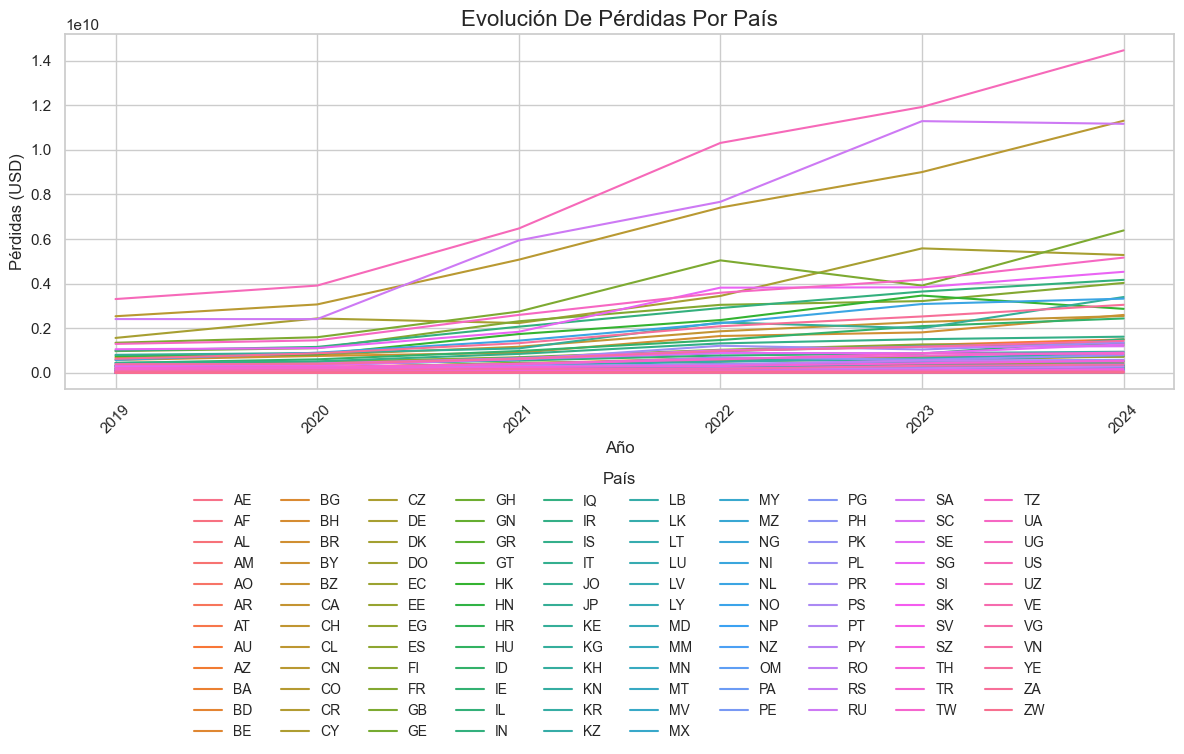

In [95]:
# Configurar el estilo de los gráficos
sns.set_theme(style="whitegrid")

# Crear el gráfico de líneas
plt.figure(figsize=(12, 8))

sns.lineplot(
    data=df_limpios,
    x='anio',
    y='perdidas',
    hue='pais',
)

plt.title('Evolución De Pérdidas Por País', fontsize=16)
#Eje X (horizontal): Representa la variable temporal (Año) 
# desde 2019 hasta 2024.Permite observar la evolución anual de las pérdidas 
# por delitos cibernéticos.
plt.xlabel('Año', fontsize=12)
#Eje Y (vertical): Representa las pérdidas económicas en USD.
#Cada línea representa la evolución de las pérdidas en un país.
plt.ylabel('Pérdidas (USD)', fontsize=12)

# Rotar las etiquetas del eje X para que no se superpongan
plt.xticks(rotation=45)

# --- Configuración de la Leyenda Abajo del Gráfico ---
# Número de columnas para la leyenda.
num_cols = 10 

plt.legend(
    title="País",
    bbox_to_anchor=(0.5, -0.2), # Posición de la leyenda: (centro horizontal, debajo del gráfico)
    loc='upper center',
    ncol=num_cols,
    frameon=False,
    fontsize='small'
)

# Ajustar el espacio inferior para que la leyenda quepa
plt.subplots_adjust(bottom=0.25)

# Mostrar el gráfico
plt.tight_layout()
plt.show()

# 📊  Explicación Técnica del Gráfico

El gráfico muestra la evolución de las pérdidas económicas (en USD) asociadas a incidentes de ciberseguridad en distintos países.

### 🔹 Ejes y Variables

Eje X (horizontal): Representa los años entre 2019 y 2024.

Eje Y (vertical): Representa las pérdidas económicas estimadas en dólares estadounidenses (USD).

Colores y líneas: Cada línea corresponde a un país, identificado en la leyenda inferior mediante su código ISO de dos letras.

### 🔹 Interpretación de Tendencias

Crecimiento Generalizado:
Se observa una tendencia ascendente en la mayoría de los países, lo que indica que las pérdidas por ciberincidentes han aumentado de manera constante en el período analizado.

Países con Pérdidas Más Elevadas:
Algunas curvas (con colores destacados en la parte superior, como US, CN e IN) muestran incrementos más pronunciados, lo que sugiere que estas naciones han reportado las pérdidas más altas.

Incremento Acelerado desde 2021:
A partir de 2021, se nota un punto de inflexión donde las pérdidas se incrementan de manera más marcada, lo cual puede estar relacionado con:

El aumento de la digitalización tras la pandemia.

Mayor cantidad de ataques sofisticados (ransomware, phishing avanzado, etc.).

Más transparencia en los reportes y registros de incidentes.

Variabilidad Entre Países:

Algunos países mantienen curvas relativamente estables con pérdidas bajas (ej. países más pequeños o con menos reportes).

Otros muestran una tendencia exponencial, reflejando mayor vulnerabilidad o mayor exposición a ataques.

### 🔹 Conclusión

Este gráfico refleja cómo los incidentes de ciberseguridad representan un costo económico creciente a nivel global. La disparidad entre países sugiere que factores como el tamaño de la economía, la madurez digital, el nivel de infraestructura crítica y la capacidad de respuesta ante ataques influyen directamente en el impacto económico.

# 🌍 Quejas en 6 Países

Mediante un gráfico de área apilada se muestra las quejas por pais en este caso fueron 6 países los escogidos.
Países escogidos para este gráfico:
- Ecuador.
- Colombia.
- Estados Unidos.
- Rusia.
- España.
- Francia.

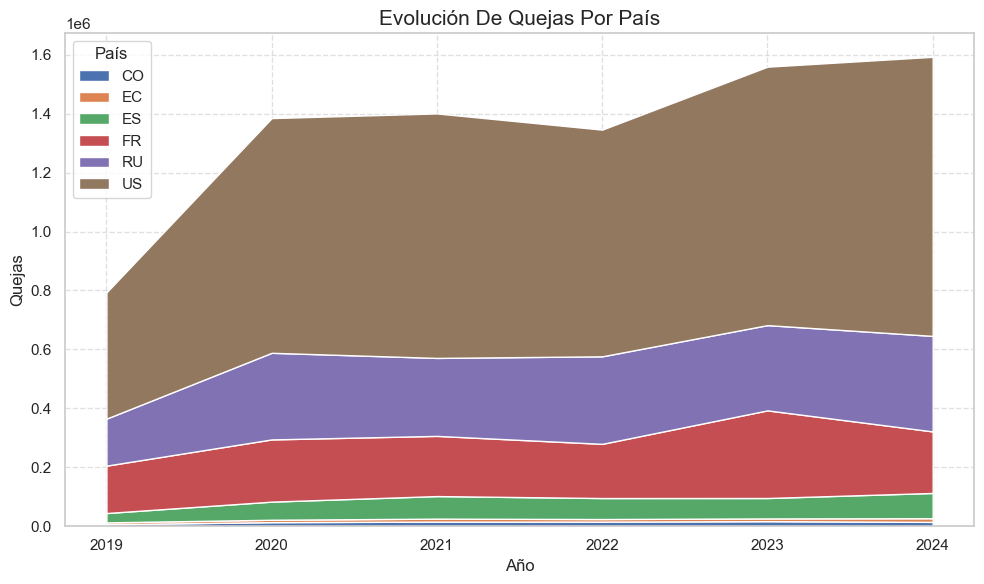

In [96]:
# Seleccionar países, en este caso se recopila los países (Ecuador= Ec, Colombia: Co
# Estados Unidos= US, Rusia=RU, España=ES, Francia=FR)
paises = ['EC','CO', 'US', 'RU', 'ES', 'FR']
df_plot = df_limpios[df_limpios['pais'].isin(paises)]

# Preparar los datos para el gráfico de área apilada
# Pivotar la tabla para que cada país sea una columna
df_stack = df_plot.pivot_table(
    index='anio',
    columns='pais',
    values='quejas', 
    aggfunc='sum'
).fillna(0) # Reemplazar valores nulos con 0

# Obtener los años y los valores de quejas para cada país
anios = df_stack.index
quejas_por_pais = df_stack.values.T # Transposición de los valores
labels = df_stack.columns

# Crear el gráfico de área apilada
plt.figure(figsize=(10, 6))

plt.stackplot(
    anios,
    quejas_por_pais,
    labels=labels
)

# Personalización del gráfico
plt.title('Evolución De Quejas Por País', fontsize=15)
#Eje X (horizontal): Representa la variable temporal (Año) 
# desde 2019 hasta 2024.Permite observar la evolución anual de las quejas
# por delitos cibernéticos.
plt.xlabel('Año')
#El valor total de quejas está en notación científica.
plt.ylabel('Quejas') 
plt.legend(title='País', loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## 📊  Análisis Técnico del Gráfico: Evolución de Quejas en 6 País

El gráfico presentado es un **diagrama de área apilada** que muestra la evolución del número de quejas por país en el período comprendido entre **2019 y 2024**.

### 🔹 Ejes del gráfico:
- **Eje X (horizontal)**: Representa los años (de 2019 a 2024).
- **Eje Y (vertical)**: Representa la cantidad total de quejas en unidades de millones (`1e6`).

### 🔹 Leyenda:
Cada color en el gráfico representa un país diferente. Los países están codificados de la siguiente manera:

- `CO` → Marrón
- `EC` → Verde claro
- `ES` → Rojo
- `FR` → Azul
- `RU` → Morado
- `US` → Gris oscuro

### 🔹 Características del gráfico:
- El gráfico utiliza **áreas apiladas** para mostrar la distribución y evolución acumulativa de las quejas por país a lo largo del tiempo.
- Las áreas permiten visualizar tanto el **total global de quejas** por año como la **proporción relativa** de cada país dentro de ese total.
- Se puede observar que algunos países tienen un volumen de quejas consistentemente mayor que otros.

### 🔹 Observaciones clave:
- Hay un **aumento general en el número de quejas** desde 2019 hasta 2024.
- El país identificado como `CO` muestra una contribución significativamente alta a lo largo de todo el período.
- En 2023 se observa un **pico** en el número de quejas totales, seguido de un leve incremento en 2024.
- Otros países como `EC` y `US` presentan una participación más estable y con menor crecimiento relativo.

### 🔹 Conclusión:
Este gráfico proporciona una visualización efectiva del crecimiento en las quejas por país, permitiendo comparar tanto la evolución temporal como el peso específico de cada país en el total acumulado. Es una herramienta útil para el análisis de tendencias y priorización de atención por regiones.
